In [ ]:
# DATASET: https://odir2019.grand-challenge.org/
# 2 images for each subjects --> Handle both images simulutaneously

# Model: https://github.com/rwightman/pytorch-image-models/

In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!mkdir 'ODIR_DATASET'
!mkdir 'ODIR_DATASET/Training'
!mkdir 'ODIR_DATASET/Test'
%cd ODIR_DATASET/Training

/content/drive/MyDrive/ODIR_DATASET/Training


In [ ]:
# Training set
!gdown 1UGrMGfb9zvbBqOvbV62G-XdUlBIAvOad

# Annotations
!gdown 1jc7Dmp26km0PKRwf9u3Xcyui4SRiojcT

Downloading...
From: https://drive.google.com/uc?id=1UGrMGfb9zvbBqOvbV62G-XdUlBIAvOad
To: /content/drive/MyDrive/ODIR_DATASET/Training/ODIR-5K_Training_Images.7z
100% 1.13G/1.13G [00:17<00:00, 65.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jc7Dmp26km0PKRwf9u3Xcyui4SRiojcT
To: /content/drive/MyDrive/ODIR_DATASET/Training/ODIR-5K_Training_Annotations(Updated)_V2.xlsx
100% 268k/268k [00:00<00:00, 3.59MB/s]


In [15]:
!7z e ODIR-5K_Training_Images.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1128791935 bytes (1077 MiB)

Extracting archive: ODIR-5K_Training_Images.7z
--
Path = ODIR-5K_Training_Images.7z
Type = 7z
Physical Size = 1128791935
Headers Size = 77932
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 1        0% 17 - ODIR-5K_Training_Dataset/1013_left.jpg                                                  0% 32 - ODIR-5K_Training_Dataset/101_right.jpg                                                  0% 49 - ODIR-5K_Training_Dataset/1032_left.jpg

In [22]:
%rm ODIR-5K_Training_Images.7z
%mkdir Training_Images
%mv *.jpg Training_Images

In [26]:
!rm -rf 'ODIR-5K_Training_Dataset'

In [57]:
%cd ..
!mkdir 'Test'

/content/drive/MyDrive/ODIR_DATASET


In [60]:
%cd Test

# Test images
!gdown 19OD9a29nrSbLC2Pch4UZtpp8qtFZLd-y

/content/drive/MyDrive/ODIR_DATASET/Test
Downloading...
From: https://drive.google.com/uc?id=19OD9a29nrSbLC2Pch4UZtpp8qtFZLd-y
To: /content/drive/MyDrive/ODIR_DATASET/Test/ODIR-5K_Testing_Images.7z
100% 171M/171M [00:02<00:00, 80.0MB/s]


In [62]:
!7z e ODIR-5K_Testing_Images.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 171422243 bytes (164 MiB)

Extracting archive: ODIR-5K_Testing_Images.7z
--
Path = ODIR-5K_Testing_Images.7z
Type = 7z
Physical Size = 171422243
Headers Size = 17325
Method = Deflate
Solid = +
Blocks = 1

  0%      1% 19 - ODIR-5K_Testing_Images/1029_right.jpg                                                 2% 33 - ODIR-5K_Testing_Images/1051_right.jpg                                                 4% 50 - ODIR-5K_Testing_Images/1078_left.jpg                                    

In [63]:
%rm ODIR-5K_Testing_Images.7z

In [69]:
!gdown 1rQCwZYq3Iu02uU9UzGQ1HdWqU_Xuwfx2

Downloading...
From: https://drive.google.com/uc?id=1rQCwZYq3Iu02uU9UzGQ1HdWqU_Xuwfx2
To: /content/drive/MyDrive/ODIR_DATASET/Test/XYZ_ODIR.csv
100% 11.0k/11.0k [00:00<00:00, 26.7MB/s]


In [79]:
%mkdir Test_images
%mv *.jpg Test_images

In [81]:
%cd ..

/content/drive/MyDrive/ODIR_DATASET


# Libraries

In [1]:
%cd /content/drive/MyDrive/ODIR_DATASET

/content/drive/MyDrive/ODIR_DATASET


In [2]:
!pip install -q pytorch_lightning timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.5 MB/s eta 0:00:00


In [3]:
import os, torch, torchvision, cv2, timm
import albumentations as A

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import seed_everything, LightningModule, Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor
from albumentations.pytorch import ToTensorV2
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set_style('dark')

# Data & Augmentation

In [4]:
train_df = pd.read_excel('Training/ODIR-5K_Training_Annotations(Updated)_V2.xlsx')
train_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [5]:
test_df = pd.read_csv('Test/XYZ_ODIR.csv')
test_df.head()

,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [6]:
IMG_SIZE = 256

aug = A.Compose([A.Resize(IMG_SIZE, IMG_SIZE),
                 A.CenterCrop(224, 224),
                 A.HorizontalFlip(p=0.5),
                 A.VerticalFlip(p=0.5),
                 A.ShiftScaleRotate(0.05, 0.05, 5),
                 A.RandomBrightnessContrast(p=0.5),
                 A.CLAHE(),
                 A.CoarseDropout(),
                 A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
                 ToTensorV2()], p=1.0, is_check_shapes=False, additional_targets={'image0':'image'})

In [26]:
TRAIN_PATH = 'Training/Training_Images'
TEST_PATH = 'Test/Test_images'

In [8]:
class DataReader(Dataset):

    def __init__(self, df, path, transform=None):

        self.df = df
        self.path = path
        self.transform = transform


    def __getitem__(self, index):
        id_path = self.df.iloc[index, 0]
        labels = self.df.iloc[index, -8::] # the last 8 columns

        left_path  = os.path.join(self.path, str(id_path) + '_left.jpg')
        right_path = os.path.join(self.path, str(id_path) + '_right.jpg')

        left_image = cv2.imread(left_path)
        right_image = cv2.imread(right_path)

        left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
        right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)

        if self.transform:
            image = self.transform(image=left_image, image0=right_image)

            left_eye = image['image']
            right_eye = image['image0']

        return left_eye, right_eye, torch.tensor(labels, dtype=torch.float32)


    def __len__(self):
        return (len(self.df))

In [9]:
train_data = DataReader(train_df, TRAIN_PATH, aug)
train_loader = DataLoader(train_data, shuffle=False, num_workers=0, batch_size=16)

left, right, label = next(iter(train_loader))

print(left.shape, right.shape, label.shape)

torch.Size([16, 3, 224, 224]) torch.Size([16, 3, 224, 224]) torch.Size([16, 8])


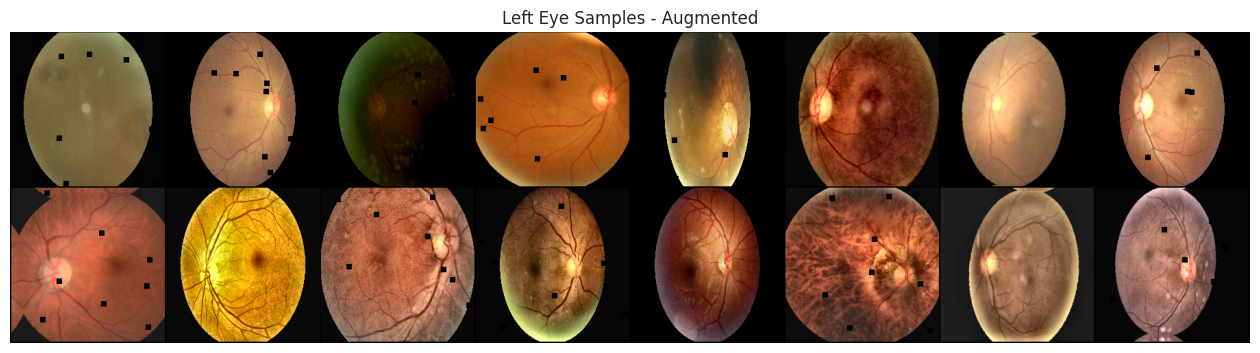

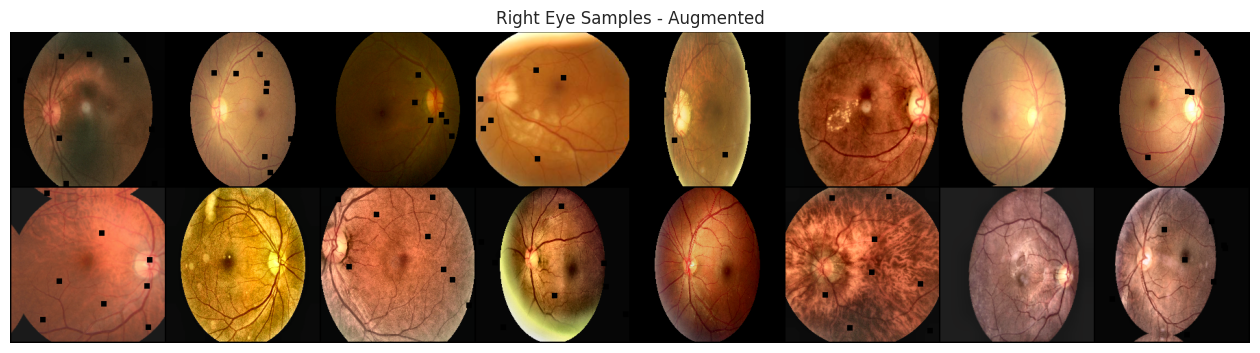

In [10]:
plt.figure(figsize=(16, 16))
grid_image = torchvision.utils.make_grid(left, 8, 2)
plt.axis('off')
plt.title('Left Eye Samples - Augmented')
plt.imshow(grid_image.permute(1, 2, 0))

plt.figure(figsize=(16, 16))
grid_image = torchvision.utils.make_grid(right, 8, 2)
plt.axis('off')
plt.title('Right Eye Samples - Augmented')
plt.imshow(grid_image.permute(1, 2, 0))

In [11]:
# Split 80-20
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=123)

# Model

In [93]:
timm.list_models('efficientnet_*', pretrained=True)

['efficientnet_b0.ra_in1k',
 'efficientnet_b1.ft_in1k',
 'efficientnet_b1_pruned.in1k',
 'efficientnet_b2.ra_in1k',
 'efficientnet_b2_pruned.in1k',
 'efficientnet_b3.ra2_in1k',
 'efficientnet_b3_pruned.in1k',
 'efficientnet_b4.ra2_in1k',
 'efficientnet_b5.sw_in12k',
 'efficientnet_b5.sw_in12k_ft_in1k',
 'efficientnet_el.ra_in1k',
 'efficientnet_el_pruned.in1k',
 'efficientnet_em.ra2_in1k',
 'efficientnet_es.ra_in1k',
 'efficientnet_es_pruned.in1k',
 'efficientnet_lite0.ra_in1k']

In [98]:
test_model = timm.create_model('efficientnet_b1', pretrained=True)
test_model.classifier

Linear(in_features=2048, out_features=1000, bias=True)

In [12]:
class MultilabelModel(LightningModule):

    def __init__(self):

        super(MultilabelModel, self).__init__()

        self.model = timm.create_model('efficientnet_b1', pretrained=True)

        # Architecture ---> out_features = 1000 --> two inputs (left, right) = 1000 * 2 = 2000
        self.fc1 = nn.Linear(2000, 1000)
        self.relu = nn.ReLU()
        self.last = nn.Linear(1000, 8)

        self.lr = 1e-3
        self.batch_size = 32
        self.numworker = 8
        self.criterion = nn.BCEWithLogitsLoss(reduction='none')

        self.test_step_label_outputs = []
        self.test_step_pred_outputs = []
        self.test_step_loss_outputs = []

    def forward(self, left_image, right_image):

        left = self.model(left_image)
        right = self.model(right_image)

        x = torch.cat((left, right), dim=1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.last(x)

        return x


    def focalloss(self, BCE, alpha=0.75, gamma=2):
        BCE_EXP = torch.exp(-BCE)
        focal_loss = alpha * (1 - BCE_EXP) ** gamma * BCE

        return focal_loss.mean()


    def configure_optimizers(self):
        opt = torch.optim.Adam(params=self.parameters(), lr=self.lr, weight_decay=1e-4)
        scheduler = CosineAnnealingWarmRestarts(opt, T_0=5, T_mult=1, eta_min=1e-5, last_epoch=-1)

        return  {'optimizer': opt, 'lr_scheduler': scheduler, 'monitor':'val_loss'}


    def train_dataloader(self):

        return DataLoader(DataReader(train_df, TRAIN_PATH, aug),
                          batch_size=self.batch_size, num_workers=self.numworker, shuffle=True)


    def training_step(self, batch, batch_idx):

        left, right, label = batch
        pred = self(right, left) # == self.forward(right, left)
        loss = self.focalloss(self.criterion(pred, label))

        self.log('train_loss', loss, on_epoch=True, prog_bar=True)

        return loss


    def val_dataloader(self):

        return DataLoader(DataReader(val_df, TRAIN_PATH, aug),
                          batch_size=self.batch_size, num_workers=self.numworker, shuffle=False)


    def validation_step(self, batch, batch_idx):

        left, right, label = batch
        pred = self(right, left)
        loss = self.focalloss(self.criterion(pred, label))

        self.log('val_loss', loss, on_epoch=True, prog_bar=True)

        return loss


    def test_dataloader(self):

        return DataLoader(DataReader(val_df, TRAIN_PATH, aug),
                          batch_size=self.batch_size, num_workers=self.numworker, shuffle=False)


    def test_step(self, batch, batch_idx):

        left, right, label = batch
        pred = self(right, left)
        loss = self.focalloss(self.criterion(pred, label))

        self.test_step_label_outputs.append(label)
        self.test_step_pred_outputs.append(pred)
        self.test_step_loss_outputs.append(loss)

        return loss


    def ODIR_Metrics(self, gt_data, pr_data):

        th = 0.5
        gt_data = gt_data.cpu().numpy()
        pr_data = pr_data.cpu().numpy()
        gt = gt_data.flatten()
        pr = pr_data.flatten()

        kappa = metrics.cohen_kappa_score(gt, pr>th)
        f1 = metrics.f1_score(gt, pr>th, average='micro')
        auc = metrics.roc_auc_score(gt, pr)
        acc = metrics.accuracy_score(gt, pr>th)
        final_score = (kappa + f1 + auc)/3.0

        return kappa, f1, auc, final_score, acc


    def on_test_epoch_end(self):

        label = torch.cat(self.test_step_label_outputs)
        pred = torch.cat(self.test_step_pred_outputs)

        kappa, f1, auc, final_score, acc = self.ODIR_Metrics(label, pred)

        self.log('kappa', np.round(kappa, 6))
        self.log('f1', np.round(f1,3))
        self.log('auc', np.round(auc,3))
        self.log('acc',np.round(acc,3))
        self.log('final_score', np.round(final_score,3))

In [13]:
model = MultilabelModel()

lr_monitor = LearningRateMonitor(logging_interval='epoch')
early_stop_callback = EarlyStopping(monitor='val_loss',  patience=10, verbose=True, mode='min')
checkpoint_callback = ModelCheckpoint(monitor='val_loss', dirpath='', filename='savefile' )

trainer = Trainer(max_epochs=5,
                  accelerator='auto',
                  deterministic=True,
                  precision='16-mixed',
                  callbacks=[lr_monitor, early_stop_callback, checkpoint_callback])

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [14]:
%%time
trainer.fit(model)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:617: UserWarning: Checkpoint directory  exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params
------------------------------------------------
0 | model     | EfficientNet      | 7.8 M 
1 | fc1       | Linear            | 2.0 M 
2 | relu      | ReLU              | 0     
3 | last      | Linear            | 8.0 K 
4 | criterion | BCEWithLogitsLoss | 0     
------------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.213    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.058


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.057


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.055


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.052


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.052
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


CPU times: user 1min 46s, sys: 13.4 s, total: 1min 59s
Wall time: 32min 37s


In [15]:
trainer.test()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at savefile-v1.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at savefile-v1.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│            acc            │           0.877           │
│            auc            │            0.9            │
│            f1             │           0.877           │
│        final_score        │           0.682           │
│           kappa           │         0.268698          │
└───────────────────────────┴───────────────────────────┘

[{'kappa': 0.268698,
  'f1': 0.877,
  'auc': 0.9,
  'acc': 0.877,
  'final_score': 0.682}]

In [27]:
loader = DataLoader(DataReader(test_df, TEST_PATH, aug), batch_size = model.batch_size, num_workers=model.numworker, shuffle=False)
batch = next(iter(loader))
batch[0].shape,batch[1].shape

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(torch.Size([32, 3, 224, 224]), torch.Size([32, 3, 224, 224]))

In [28]:
model = model.cuda()
preds = []

with torch.no_grad():
    model.eval()
    for batch in loader:
        preds.append(model(batch[0].cuda(), batch[1].cuda()))

In [30]:
preds = torch.cat(preds)

In [31]:
preds = preds.detach().cpu().numpy()
preds = np.where(preds>0.5, 1, 0)

for i,j in enumerate(test_df.columns[1::]):
    test_df[j] = preds[:,i]

test_df.head()

,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [38]:
test_df.to_csv('test1.csv')

In [34]:
preds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
test_df[20:40]

,ID,N,D,G,C,A,H,M,O
20,1051,0,0,0,0,0,0,0,0
21,1055,0,0,0,0,0,0,0,0
22,1057,0,0,0,0,0,0,0,0
23,1063,0,0,0,0,0,0,0,0
24,1067,0,0,0,0,0,0,0,1
25,1069,0,0,0,0,0,0,0,0
26,1070,0,0,0,0,0,0,0,0
27,1073,0,0,0,0,0,0,0,0
28,1076,0,0,0,0,0,0,0,0
29,1078,0,0,0,0,0,0,0,0
